# Graphics Testing

Notebook to test graphics during development.

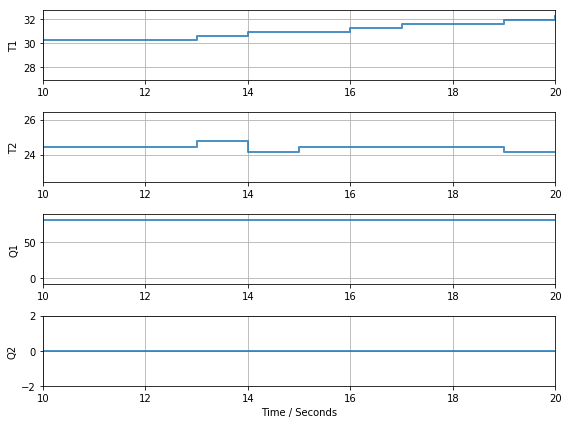

TCLab disconnected successfully.
22.864730834960938 seconds


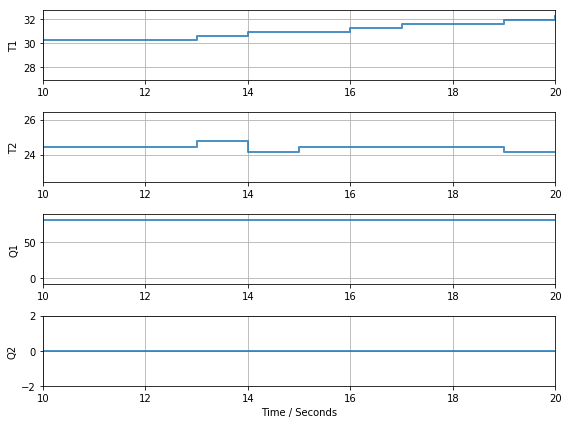

In [2]:
%matplotlib inline
from tclab import setup
from tclab import Historian, Plotter, clock
import time

tic = time.time()
lab = setup(connected=True, speedup=1)
with lab() as a:
    h = Historian(a.sources)
    p = Plotter(h,10)
    for t in clock(20):
        a.U1 = 80
        p.update(t)
toc = time.time()

print(toc-tic, 'seconds')

## Non-blocking Operation

In [1]:
import threading, time

next_call = time.time()

def foo():
  global next_call
  print(datetime.datetime.now())
  next_call = next_call+1
  threading.Timer( next_call - time.time(), foo ).start()

#foo()

def bar():
    clock.send(None)

def clock(tperiod):
    tstart = time.time()
    tfinish = tstart + tperiod
    t = 0
    while t + tstart < tfinish:
        z = yield t
        t += 1

def bar():
    clock.send(2)

In [4]:
c = clock(4)
c.send(None)
c.send(2)

1

In [3]:
bar()

AttributeError: 'function' object has no attribute 'send'